### PCOS Detection Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
#Reading the data set
dwi = pd.read_csv('PCOS_infertility.csv')
dwwi = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

dwwi.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
# Merging dwi and dwwi 
PCOS_merged= pd.merge(dwwi, dwi, on='Patient File No.', suffixes=('','_y'), how='left')

PCOS_merged.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Droping recurring features
df=PCOS_merged.drop(['Sl. No_y', 'PCOS (Y/N)_y', 'Unnamed: 44', '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [5]:
# data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [6]:
# form the above info, it can be seen that values of 2 features were inputed as strings. So I will convert them to int.
df["II    beta-HCG(mIU/mL)"]= pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')
df["AMH(ng/mL)"]= pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## Exploratory Data Analysis (EDA)


In [7]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [8]:
#checking for missing/null values

#df.isnull().sum()
df.isna().sum() 

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

#### Replacing missing values with median


In [9]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

df.columns = [col.strip() for col in df.columns]

#### visualizing some outliers using boxplot

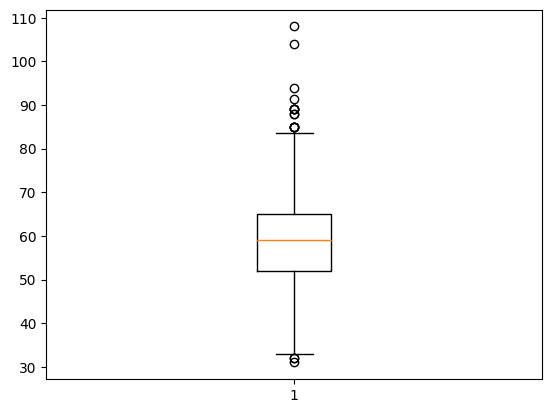

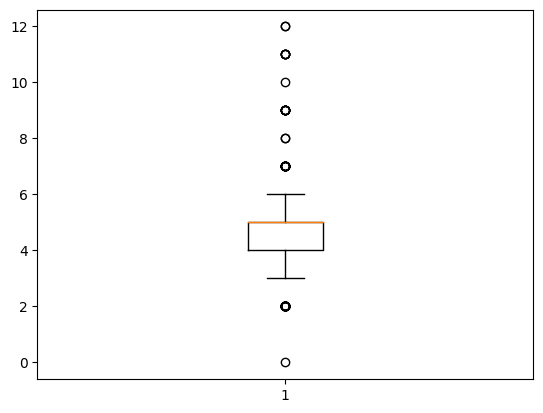

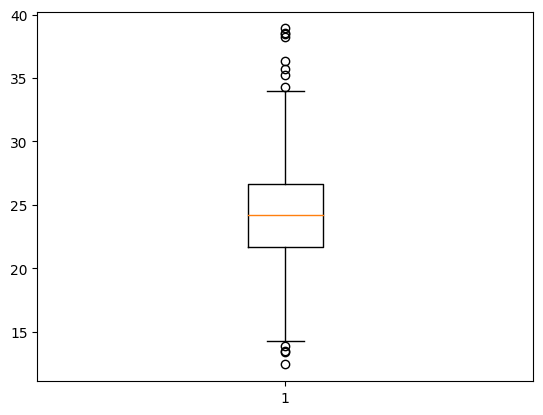

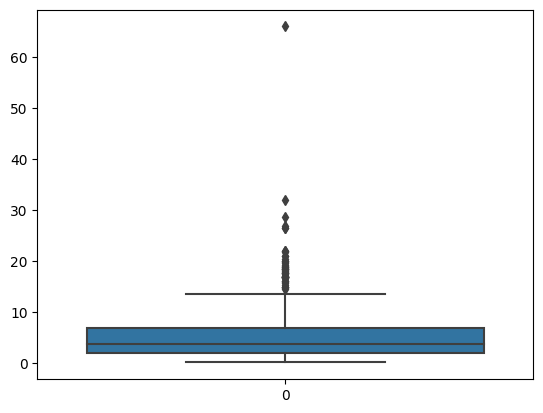

In [10]:
plt.boxplot(df["Weight (Kg)"])
plt.show()

plt.boxplot(df['Cycle length(days)'])
plt.show()

plt.boxplot(df['BMI'])
plt.show()

sns.boxplot(df['AMH(ng/mL)'])
plt.show()

#### Correlation Matrix

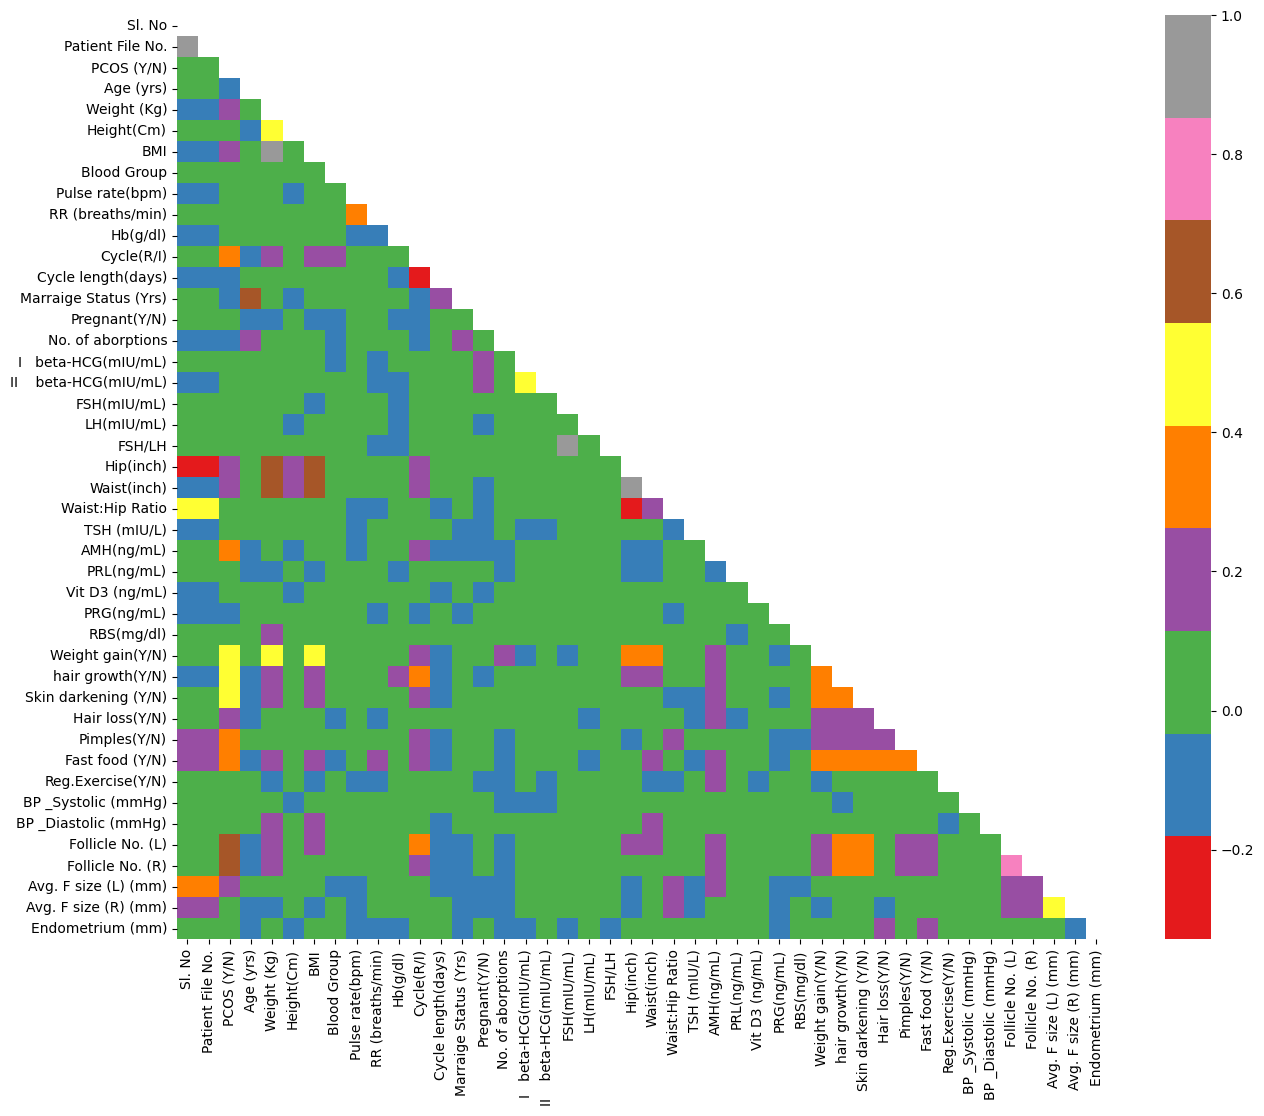

In [11]:
corr_mat = df.corr()
plt.subplots(figsize=(15,12))
                     
mask = np.zeros_like(corr_mat, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr_mat,cmap="Set1", mask=mask);

In [12]:
#The correlation between PCOS and the various features
corr_mat["PCOS (Y/N)"].sort_values()

Cycle length(days)       -0.178480
Age (yrs)                -0.168513
Marraige Status (Yrs)    -0.113056
No. of aborptions        -0.057158
PRG(ng/mL)               -0.043834
FSH(mIU/mL)              -0.030319
I   beta-HCG(mIU/mL)     -0.027617
Pregnant(Y/N)            -0.027565
FSH/LH                   -0.018336
TSH (mIU/L)              -0.010140
PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.012760
Blood Group               0.036433
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
RBS(mg/dl)                0.048922
Patient File No.          0.060998
Sl. No                    0.060998
LH(mIU/mL)                0.063879
Reg.Exercise(Y/N)         0.065337
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)          0.106648
Avg. F size (L) (mm)

In [13]:
# Dropping some columns that may not be neccesary and or having the same ratio
df.drop(columns=['FSH/LH'],axis=1,inplace=True)
df.drop('Waist(inch)',axis=1,inplace=True)
df.drop('Hip(inch)',axis=1,inplace=True)

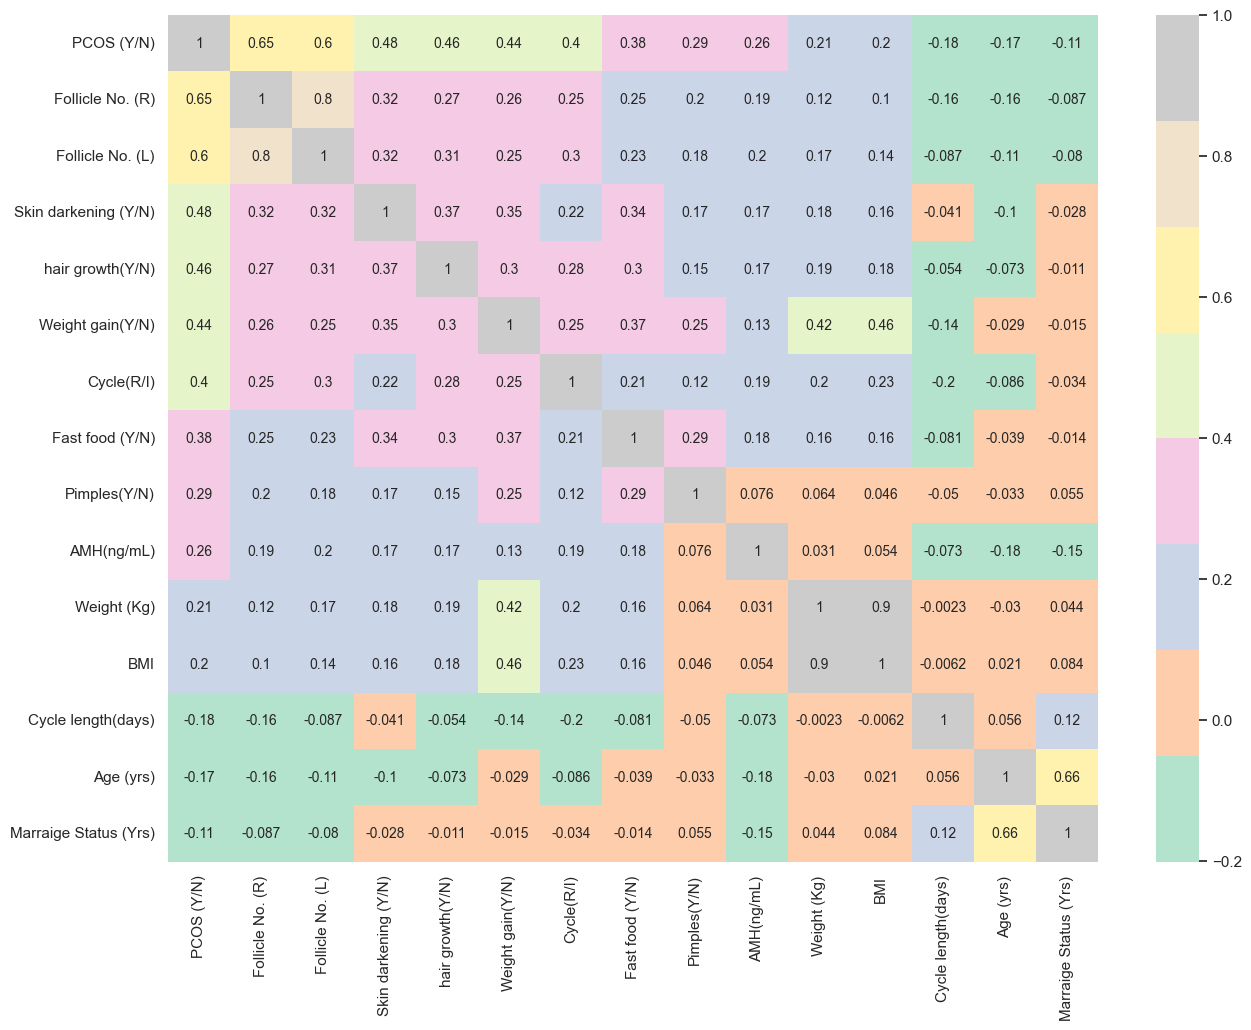

In [22]:
# Visualizing the corrrelation between some seleccted variables
plt.figure(figsize=(15,11))
p_corr= 12 #some variables with positive correlation
n_corr= 3 #some variables with negative correlation
cols_p = corr_mat.nlargest(p_corr, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corr_mat.nsmallest(n_corr, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)

hm = sns.heatmap(cm, cbar=True, cmap='Pastel2', annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Patterns of some features in relation with POCS using lmplot

In [ ]:
sns.lmplot(data =df,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)")
plt.show()

In [ ]:
sns.lmplot(data=df, y="Cycle length(days)", x="BMI", hue="PCOS (Y/N)")
plt.show()

In [ ]:
fig=sns.lmplot(data=df,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)")
plt.show(fig)

In [ ]:
sns.scatterplot(data=df, x='Follicle No. (L)', y='Follicle No. (R)', hue="PCOS (Y/N)")
plt.show()

### Model building


In [19]:
X=df.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1)
y=df["PCOS (Y/N)"]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [20]:
pcos_model= RandomForestClassifier()
pcos_model.fit(X_train,y_train)

model_prediction= pcos_model.predict(X_test)
accu= accuracy_score(y_test, model_prediction)
print(accu)

0.901840490797546


In [ ]:
parameters = {'n_estimators': [100,150, 200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]}

gs_pm = GridSearchCV(estimator=pcos_model, param_grid=parameters, cv= 7)
gs_pm.fit(X_train, y_train)

gs_pm.best_params_

### Model evaluation with tuned hyperparameters

In [24]:
pcos_model_f=RandomForestClassifier(**gs_pm.best_params_)
pcos_model_f.fit(X_train, y_train)

predictions=pcos_model_f.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.9141104294478528

##### The accuracy of the model is seen to improve after using the parameters of the hyperparameter tuning process

####

In [25]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       109
           1       0.92      0.81      0.86        54

    accuracy                           0.91       163
   macro avg       0.91      0.89      0.90       163
weighted avg       0.91      0.91      0.91       163

